# Import

In [26]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Chargement des données

In [1]:
# Read the dataset path from the file
with open('dataset_path.txt', 'r') as file:
    dataset_path = file.read().strip()

print(f"Dataset path: {dataset_path}")

Dataset path: /home/alex/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset


In [3]:
# Chemins vers les dossiers contenant les images
male_faces_path = os.path.join(dataset_path, 'Male Faces')
female_faces_path = os.path.join(dataset_path, 'Female Faces')

# Lister les fichiers d'images dans chaque dossier
male_faces_files = os.listdir(male_faces_path)[:5]
female_faces_files = os.listdir(female_faces_path)[:5]

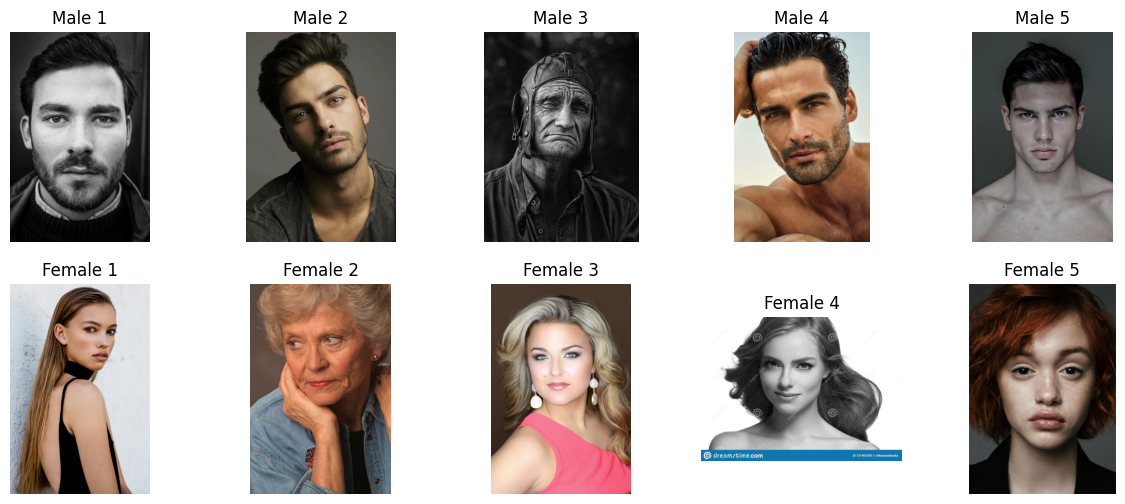

In [5]:
# Afficher les 5 premières images de chaque dossier
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, file in enumerate(male_faces_files):
    img = mpimg.imread(os.path.join(male_faces_path, file))
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Male {i+1}')

for i, file in enumerate(female_faces_files):
    img = mpimg.imread(os.path.join(female_faces_path, file))
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Female {i+1}')

plt.show()

In [ ]:
# Fonction pour charger les images et les convertir en vecteurs
def load_images(data_dir, categories, image_size=(128, 128)):
    valid_extensions = ('.jpg', '.jpeg', '.png')
    X = []
    y = []
    for category in categories:
        category_path = os.path.join(data_dir, category)
        for file_name in os.listdir(category_path):
            if file_name.endswith(valid_extensions):
                file_path = os.path.join(category_path, file_name)
                try:
                    # Ouvrir l'image et redimensionner
                    img = Image.open(file_path).convert('RGB')
                    img = img.resize(image_size)
                    
                    # Convertir en numpy array et aplatir
                    img_array = np.array(img).flatten()
                    X.append(img_array)
                    y.append(category)
                except Exception as e:
                    print(f"Erreur avec le fichier {file_path}: {e}")
    return np.array(X), np.array(y)

In [24]:
categories = ['Male Faces', 'Female Faces']

# Charger les données
image_size = (128, 128)  # Taille à laquelle redimensionner les images
X, y = load_images(dataset_path, categories, image_size)

/home/alex/Documents/VS Code/GenderVision/venv_gendervision/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
X.shape, y.shape

((5400, 49152), (5400,))

# Traitement des données

In [27]:
# Encoder les labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Création d'un dataset d'entraînement

In [28]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Création d'un modèle de Machine Learning (classification)

In [32]:
# Créer le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrainement

In [33]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

# Evaluation résultat

In [34]:
# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
print("Rapport de classification:")
print(classification_report(y_test, y_pred, target_names=categories))
print("Précision:", accuracy_score(y_test, y_pred))

Rapport de classification:
              precision    recall  f1-score   support

  Male Faces       0.98      0.98      0.98       537
Female Faces       0.98      0.98      0.98       543

    accuracy                           0.98      1080
   macro avg       0.98      0.98      0.98      1080
weighted avg       0.98      0.98      0.98      1080

Précision: 0.9787037037037037
